In [7]:
#looking at the html structure 
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = 'https://www.nintendo.co.jp/ir/en/finance/software/switch.html'

response = requests.get(base_url) 

soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="" name="keywords"/>
  <meta content="" name="description"/>
  <title>
   IR Information : Sales Data - Top Selling Title Sales Units - Nintendo Switch Software
  </title>
  <!-- ogp -->
  <meta content="IR Information : Sales Data - Top Selling Title Sales Units - Nintendo Switch Software" property="og:title"/>
  <meta content="article" property="og:type"/>
  <meta content="" property="og:description"/>
  <meta content="http://www.nintendo.co.jp/ir/en/finance/software/switch.html" property="og:url"/>
  <meta content="http://www.nintendo.co.jp/img/og_nintendo.png" property="og:image"/>
  <meta content="Nintendo Co., Ltd. " property="og:site_name"/>
  <!-- //ogp -->
  <!-- twitter-->
  <meta content="summary" name="twitter:card"/>
  <meta content="@nintendo" name="twitter:site"/>
  <meta content="@nintendo" name="twitter:creator"/>
  <meta content="

In [8]:
#regular switch sales
soup = BeautifulSoup(response.content, 'html.parser')

sales_list_container = soup.find('ul', class_='sales_layout')

data = []

if sales_list_container:
    for item in sales_list_container.find_all('li', class_='sales_layout_list'):


        title_tag = item.find('p', class_='sales_title')
        sales_title = title_tag.get_text(strip=True, separator=' ') if title_tag else 'N/A'
        
  
        value_tag = item.find('p', class_='sales_value')
        sales_value = value_tag.find('span').get_text(strip=True) if value_tag and value_tag.find('span') else 'N/A'
        
        data.append({
            'sales_title': sales_title,
            'sales_value': sales_value
        })

# 7. Create the Pandas DataFrame
nd_sales = pd.DataFrame(data)

print("✅ Successfully Extracted Sales Data into DataFrame:")
nd_sales['Switch'] = 'Switch'
display(nd_sales)

✅ Successfully Extracted Sales Data into DataFrame:


,sales_title,sales_value,Switch
0,Mario Kart 8 Deluxe,69.56,Switch
1,Animal Crossing: New Horizons,48.62,Switch
2,Super Smash Bros. Ultimate,36.93,Switch
3,The Legend of Zelda: Breath of the Wild,33.34,Switch
4,Super Mario Odyssey,29.84,Switch
5,Pokémon Scarlet/ Pokémon Violet,27.61,Switch
6,Pokémon Sword/ Pokémon Shield,26.96,Switch
7,The Legend of Zelda: Tears of the Kingdom,22.15,Switch
8,Super Mario Party,21.23,Switch
9,New Super Mario Bros. U Deluxe,18.53,Switch


import matplotlib.pyplot as plt 

Game_Title = nd_sales['sales_title']
Unit_Sales = nd_sales['sales_value']

plt.figure(figsize=(8, 6)) # Set size for better viewing
plt.bar(Unit_Sales, color=['#6abfda','#5f8185','#6abfda','#5f8185','#6abfda', '#5f8185','#6abfda','#5f8185','#6abfda'])

plt.xlabel('Game Title')
plt.ylabel('Unit Sales')
plt.title('Nintendo Per Game Title Unit Sales')

plt.show()

Successfully generated horizontal bar chart.


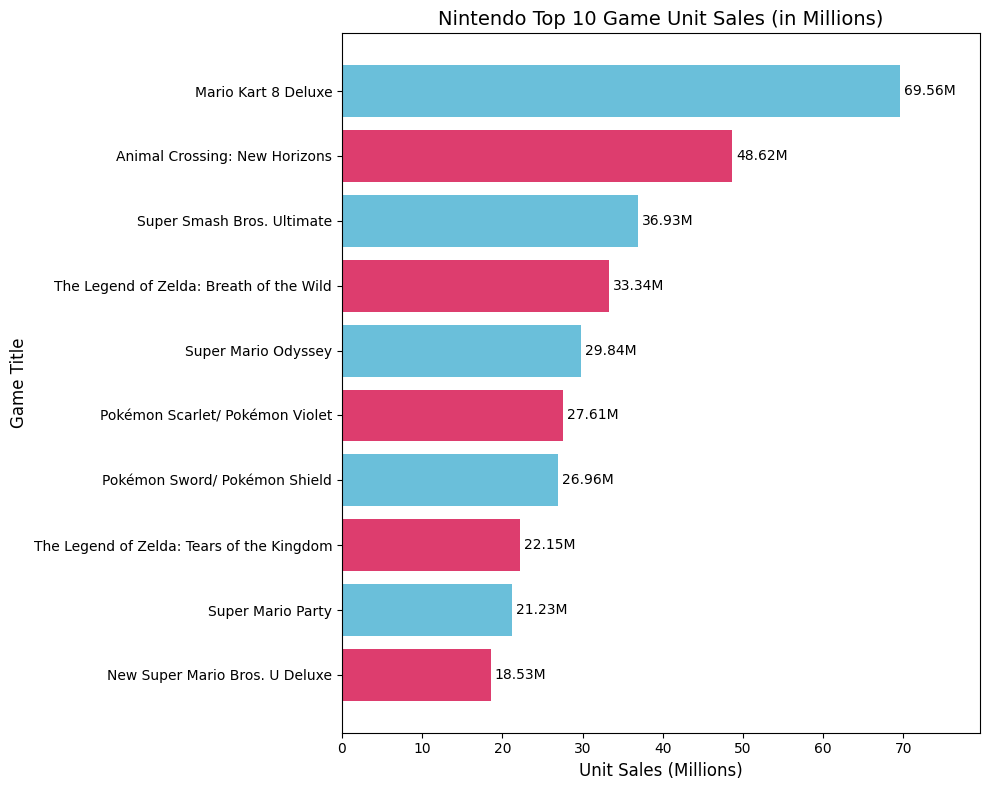

In [10]:
import pandas as pd 
nd_sales['Unit_Sales'] = pd.to_numeric(nd_sales['sales_value'])

# --- 2. Prepare Data for Plotting ---
Game_Title = nd_sales['sales_title']
Unit_Sales = nd_sales['Unit_Sales']

# We will use a horizontal bar chart (barh) and sort by sales value for clarity.
nd_sales_sorted = nd_sales.sort_values(by='Unit_Sales', ascending=True)

colors = ['#dd3d6e','#6abfda'] * 5 


plt.figure(figsize=(10, 8)) 

plt.barh(
    nd_sales_sorted['sales_title'], 
    nd_sales_sorted['Unit_Sales'], 
    color=colors
)

plt.title('Nintendo Top 10 Game Unit Sales (in Millions)', fontsize=14)
plt.xlabel('Unit Sales (Millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)

for index, value in enumerate(nd_sales_sorted['Unit_Sales']):
    plt.text(value + 0.5, index, f'{value:.2f}M', va='center')

plt.xlim(0, max(nd_sales_sorted['Unit_Sales']) + 10) 

plt.tight_layout()
plt.savefig('nintendo_top_10_sales_bar_chart.png')

In [32]:
#Switch 2 sales 

sw2_url = 'https://www.nintendo.co.jp/ir/en/finance/software/index.html'

response = requests.get(sw2_url) 

soup = BeautifulSoup(response.content, 'html.parser')
#print(soup.prettify())

sales_list_container = soup.find('ul', class_='sales_layout')

data = []

if sales_list_container:
    for item in sales_list_container.find_all('li', class_='sales_layout_list'):


        title_tag = item.find('p', class_='sales_title')
        sales_title = title_tag.get_text(strip=True, separator=' ') if title_tag else 'N/A'
        
  
        value_tag = item.find('p', class_='sales_value')
        sales_value = value_tag.find('span').get_text(strip=True) if value_tag and value_tag.find('span') else 'N/A'
        
        data.append({
            'sales_title': sales_title,
            'sales_value': sales_value
        })

sw2_sales = pd.DataFrame(data)

print("✅ Successfully Extracted Sales Data into DataFrame:")
sw2_sales['Switch 2'] = 'Switch 2'
display (sw2_sales)

✅ Successfully Extracted Sales Data into DataFrame:


,sales_title,sales_value,Switch 2
0,Mario Kart World,9.57,Switch 2
1,Donkey Kong Bananza,3.49,Switch 2


In [31]:
#wii sales 

import requests
from bs4 import BeautifulSoup
import pandas as pd

wii_url = 'https://www.nintendo.co.jp/ir/en/finance/software/wiiu.html'

response = requests.get(wii_url) 

soup = BeautifulSoup(response.content, 'html.parser')
#print(soup.prettify())

sales_list_container = soup.find('ul', class_='sales_layout')

data = []

if sales_list_container:
    for item in sales_list_container.find_all('li', class_='sales_layout_list'):


        title_tag = item.find('p', class_='sales_title')
        sales_title = title_tag.get_text(strip=True, separator=' ') if title_tag else 'N/A'
        
  
        value_tag = item.find('p', class_='sales_value')
        sales_value = value_tag.find('span').get_text(strip=True) if value_tag and value_tag.find('span') else 'N/A'
        
        data.append({
            'sales_title': sales_title,
            'sales_value': sales_value
        })

wii_sales = pd.DataFrame(data)

print("✅ Successfully Extracted Sales Data into DataFrame:")
wii_sales['Wii'] = 'Wii'
display(wii_sales)

✅ Successfully Extracted Sales Data into DataFrame:


,sales_title,sales_value,Wii
0,Mario Kart 8,8.46,Wii
1,Super Mario 3D World,5.89,Wii
2,New Super Mario Bros. U,5.82,Wii
3,Super Smash Bros. for Wii U,5.38,Wii
4,Nintendo Land,5.21,Wii
5,Splatoon,4.95,Wii
6,Super Mario Maker,4.02,Wii
7,New Super Luigi U,3.07,Wii
8,The Legend of Zelda: The Wind Waker HD,2.37,Wii
9,Mario Party 10,2.27,Wii


In [30]:
#ds3 
ds_url = 'https://www.nintendo.co.jp/ir/en/finance/software/3ds.html'

response = requests.get(ds_url) 

soup = BeautifulSoup(response.content, 'html.parser')

sales_list_container = soup.find('ul', class_='sales_layout')

data = []

if sales_list_container:
    for item in sales_list_container.find_all('li', class_='sales_layout_list'):


        title_tag = item.find('p', class_='sales_title')
        sales_title = title_tag.get_text(strip=True, separator=' ') if title_tag else 'N/A'
        
  
        value_tag = item.find('p', class_='sales_value')
        sales_value = value_tag.find('span').get_text(strip=True) if value_tag and value_tag.find('span') else 'N/A'
        
        data.append({
            'sales_title': sales_title,
            'sales_value': sales_value
        })

ds_sales = pd.DataFrame(data)

print("✅ Successfully Extracted Sales Data into DataFrame:")
ds_sales['3DS'] = '3DS'
display(ds_sales)

✅ Successfully Extracted Sales Data into DataFrame:


,sales_title,sales_value,3DS
0,Mario Kart 7,18.99,3DS
1,Pokémon X/Pokémon Y,16.78,3DS
2,Pokémon Sun/ Pokémon Moon,16.33,3DS
3,Pokémon Omega Ruby/ Pokémon Alpha Sapphire,14.67,3DS
4,New Super Mario Bros. 2,13.42,3DS
5,Animal Crossing: New Leaf,13.06,3DS
6,SUPER MARIO 3D LAND,12.89,3DS
7,Super Smash Bros. for Nintendo 3DS,9.65,3DS
8,Pokémon Ultra Sun/ Pokémon Ultra Moon,9.26,3DS
9,Tomodachi Life,6.72,3DS


In [43]:
# Assuming ds_sales, nd_sales, wii_sales, and sw2_sales are already loaded DataFrames

# 3DS Sales
ds_sales.to_csv('3ds_sales_data.csv', index=False)


# Wii Sales
wii_sales.to_csv('wii_sales_data.csv', index=False)

# Switch 2 Sales
sw2_sales.to_csv('switch2_sales_data.csv', index=False)

print("✅ All four DataFrames have been successfully exported to individual CSV files in your current working directory.")

✅ All four DataFrames have been successfully exported to individual CSV files in your current working directory.


In [45]:
import os

# This command prints the full path to the directory where files were saved
print(os.getcwd())

C:\Users\akoki\Desktop\Ironhack\Week4\Day1\first_project\notebooks


In [49]:
# Switch Sales
nd_sales.to_csv('switch_sales_data.csv', index=False)